In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from itertools import product

In [3]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
Store = 67

data = pd.read_csv('train.csv', index_col="Date", parse_dates=["Date"])
store = data[data.Store == Store]
store_ts = store.resample("W").Sales.sum()

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


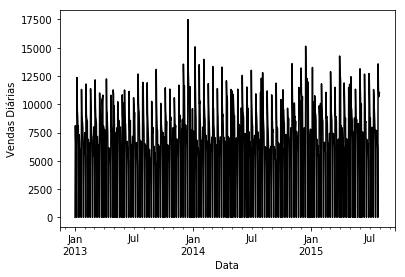

In [5]:
store.Sales.plot(cmap="gray")
plt.ylabel("Vendas Diárias")
plt.xlabel("Data")
plt.savefig("graficoRossman.png")

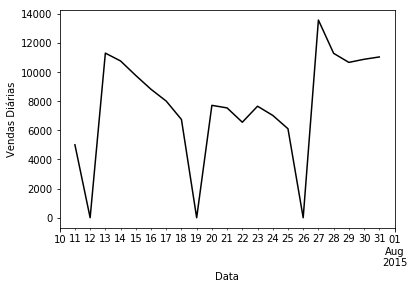

In [6]:
store.Sales[:21].plot(cmap="gray")
plt.ylabel("Vendas Diárias")
plt.xlabel("Data")
plt.savefig("graficoRossmanSemana.png")

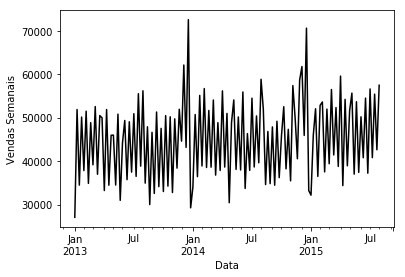

In [7]:
store_ts.plot(cmap="gray")
plt.ylabel("Vendas Semanais")
plt.xlabel("Data")
plt.savefig("graficoRossmanSemanal.png")

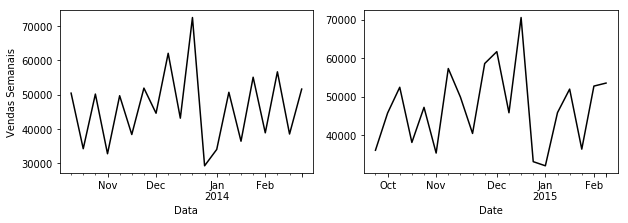

In [8]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
store_ts[40:60].plot(cmap="gray")
plt.ylabel("Vendas Semanais")
plt.xlabel("Data")

plt.subplot(122)
store_ts[90:110].plot(cmap="gray")

plt.savefig("graficoRossmanFimAno.png")

In [9]:
look_back = 2

scaler = MinMaxScaler((-1,1))
data_scaled = scaler.fit_transform(store_ts.values.reshape(-1, 1))

convert_to_step = lambda interval: data_scaled[interval[0]:interval[1]]
intervals = zip(range(len(data_scaled) - look_back), range(look_back, len(data_scaled)))

train_set, test_set = train_test_split(np.array(list(map(convert_to_step, intervals))), shuffle=False)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X, y = train_set[:-1], train_set[1:, -1]
X_test, y_test = test_set[:-1], test_set[1:, -1]

In [11]:
X = X.reshape((-1, look_back))
y = y.reshape(-1)

In [12]:
X_test = X_test.reshape((-1, look_back))
y_test = y_test.reshape((-1))

In [13]:
params_grid = {
    "activation": ("relu",),
    "hidden_layer_sizes": (12,),
    "max_iter": [4000],
    "tol": [0.000001],
    "solver": ["adam"],
    "learning_rate": ["constant"],
    "beta_2": [.994],
    "beta_1": [.688]
}

model = MLPRegressor(random_state=2)
grid_model = GridSearchCV(model, param_grid=params_grid, n_jobs=-1, cv=5)

In [14]:
res = grid_model.fit(X, y)
print(res.best_estimator_)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.688,
       beta_2=0.994, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=4000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=1e-06, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [15]:
mape(scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1), scaler.inverse_transform(res.predict(X_test).reshape(-1, 1)).reshape(-1))

8.938438537455175

In [27]:
y_test

array([-0.1714732 ,  0.91398843, -0.72885457, -0.77592996, -0.16971337,
        0.09817638, -0.58617655,  0.13258101,  0.16685365, -0.54042104,
        0.0948767 , -0.45797312,  0.29312127, -0.36892585,  0.11027519,
       -0.48555842,  0.42880398, -0.67918344,  0.19355903, -0.47882707,
        0.0795662 ,  0.25691282, -0.56312281,  0.16918542, -0.54539255,
        0.01691634, -0.39725907,  0.20605381, -0.55383972,  0.29879672,
       -0.39633516,  0.24635386, -0.31657098])

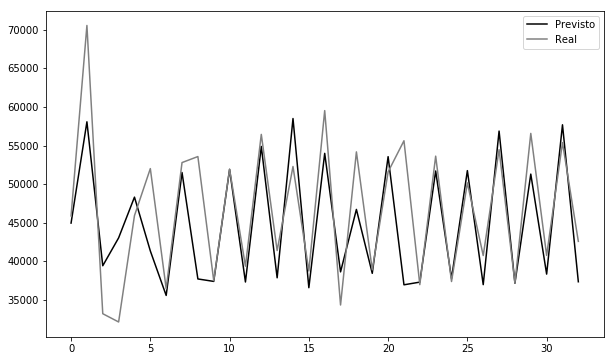

In [84]:
plt.figure(figsize=(10, 6))

prev, = plt.plot(scaler.inverse_transform(res.predict(X_test).reshape(-1,1)), color="black")

real, = plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color="gray")

plt.legend([prev, real], ["Previsto", "Real"])

plt.savefig("graficoPrevMlp.png", bbox_size="tight")

In [85]:
from pandas.plotting import autocorrelation_plot

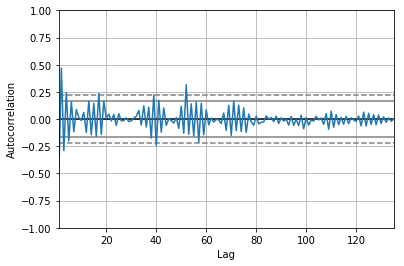

In [92]:
autocorrelation_plot(series=store_ts[:])

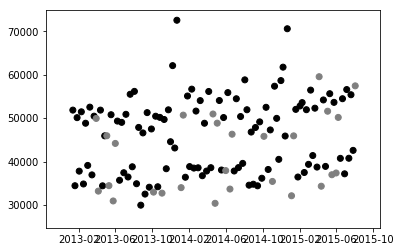

In [75]:
teste = store.resample("W").sum()
plt.scatter(x=teste.index, y=teste.Sales, c=teste.Open, cmap="binary")

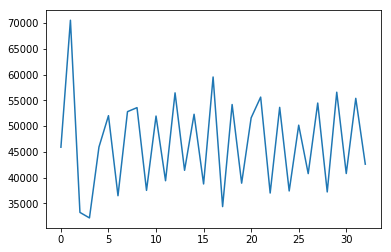

In [47]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)))

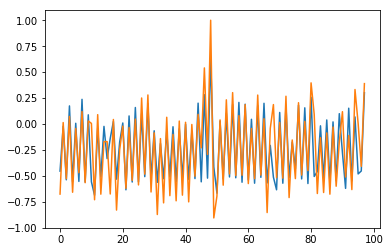

In [13]:
plt.plot(res.predict(X))
plt.plot(y)

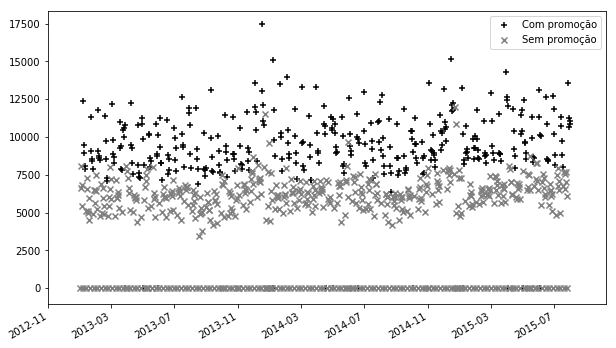

In [76]:
plt.figure(figsize=(10, 6))

com = plt.scatter(y=store[store.Promo == 1].Sales, x=store[store.Promo == 1].index, marker="+", color="black")
sem = plt.scatter(y=store[store.Promo == 0].Sales, x=store[store.Promo == 0].index, marker="x", color="gray")

plt.legend([com, sem], ["Com promoção", "Sem promoção"], loc="best")

plt.gcf().autofmt_xdate()

plt.savefig("graficoRossmanPromo.png")